
Limpeza e tratamento de Dados

In [2]:
import pandas as pd
import seaborn as srn
import statistics  as sts

In [3]:
#importar dados
dataset = pd.read_csv("Churn.csv", sep=";")
#visulizar
dataset.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [4]:
#tamanho
dataset.shape

(999, 12)

In [5]:
#primeiro problema é dar nomes as colunas
dataset.columns = ["Id","Score","Estado","Genero","Idade","Patrimonio","Saldo","Produtos","TemCartCredito",
                    "Ativo","Salario","Saiu"]

In [6]:
#visulizar
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [11]:
#explorar dados categoricos
#estado
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

<Axes: xlabel='Estado'>

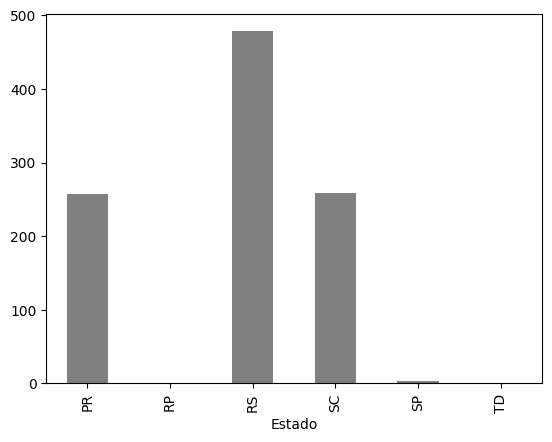

In [12]:
agrupado.plot.bar(color = 'gray')

In [13]:
#genero
agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

<Axes: xlabel='Genero'>

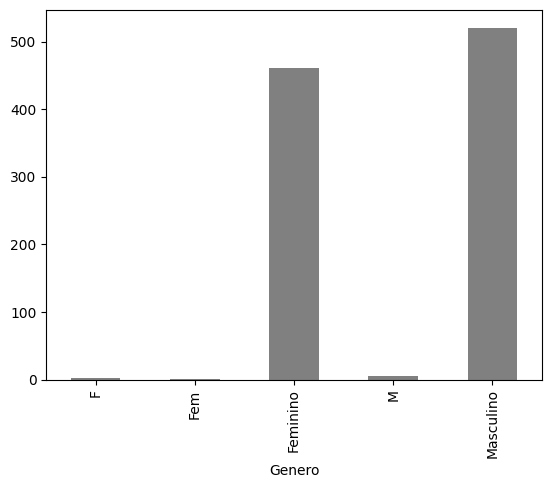

In [14]:
agrupado.plot.bar(color = 'gray')

In [15]:
#explorar colunas numéricas
#score
dataset['Score'].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

Text(0.5, 1.0, 'Score')

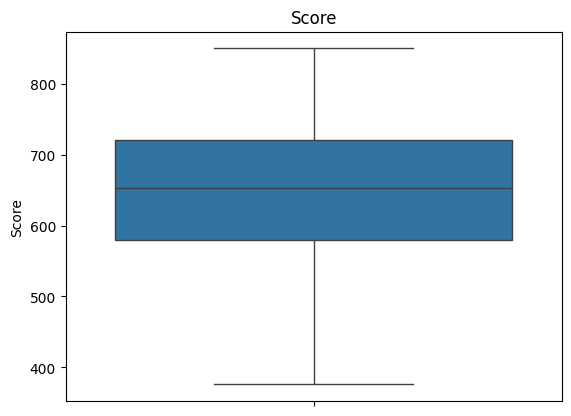

In [16]:
srn.boxplot(dataset['Score']).set_title('Score')

C:\Users\VIC_SOARES\AppData\Local\Temp\ipykernel_7996\4068248596.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  srn.distplot(dataset['Score']).set_title('Score')


Text(0.5, 1.0, 'Score')

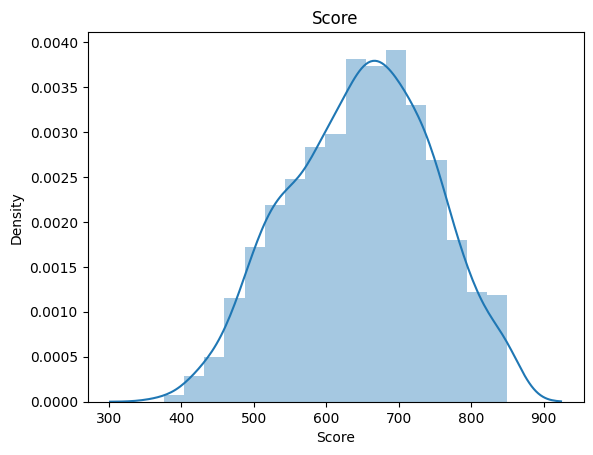

In [17]:
srn.distplot(dataset['Score']).set_title('Score')

In [18]:
#idade
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

Text(0.5, 1.0, 'Idade')

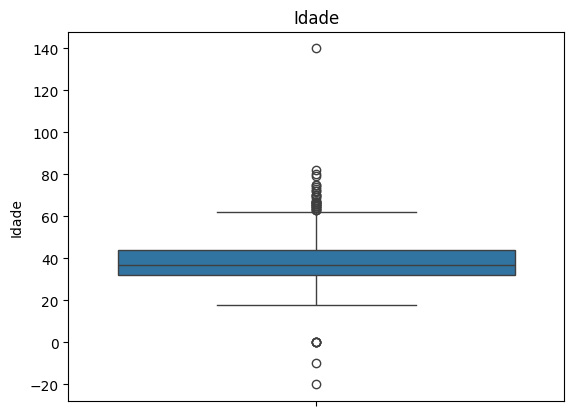

In [19]:
srn.boxplot(dataset['Idade']).set_title('Idade')

C:\Users\VIC_SOARES\AppData\Local\Temp\ipykernel_7996\1712185710.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  srn.distplot(dataset['Idade']).set_title('Idade')


Text(0.5, 1.0, 'Idade')

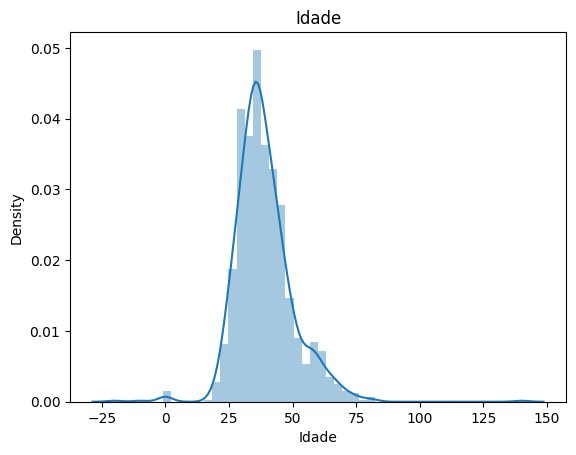

In [20]:
srn.distplot(dataset['Idade']).set_title('Idade')

In [ ]:
#saldo
dataset['Saldo'].describe()

In [ ]:
srn.boxplot(dataset['Saldo']).set_title('Saldo')

In [ ]:
srn.distplot(dataset['Saldo']).set_title('Saldo')

In [ ]:
#salário
dataset['Salario'].describe()

In [ ]:
srn.boxplot(dataset['Salario']).set_title('Salario')

In [ ]:
srn.distplot(dataset['Salario']).set_title('Salario')

In [21]:
#contamos valores NAN
#genero e salário
dataset.isnull().sum()

Id                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           7
Saiu              0
dtype: int64

In [22]:
#salarios
#remover nas e substiutir pela mediana
dataset['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

In [23]:
mediana = sts.median(dataset['Salario'])
mediana

70518.0

In [24]:
#substituir NAN por mediana
dataset['Salario'].fillna(mediana, inplace=True)

C:\Users\VIC_SOARES\AppData\Local\Temp\ipykernel_7996\3202760720.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Salario'].fillna(mediana, inplace=True)


In [25]:
#Verificamos se NAN não existem mais
dataset['Salario'].isnull().sum()

0

In [26]:
#genero, falta de padronização e NAs
agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [ ]:
#total de Nas
dataset['Genero'].isnull().sum()

In [ ]:
#preenche NAs com Masculino (moda)
dataset['Genero'].fillna('Masculino', inplace=True)

In [ ]:
#verificamos novamente NANs
dataset['Genero'].isnull().sum()

In [ ]:
#padroniza de acordo com o dominio
dataset.loc[dataset['Genero'] ==  'M', 'Genero'] = "Masculino"
dataset.loc[dataset['Genero'].isin( ['Fem','F']), 'Genero'] = "Feminino"
#visualiza o resultado
agrupado = dataset.groupby(['Genero']).size()
agrupado

In [ ]:
#idades fora do dominio
dataset['Idade'].describe()

In [ ]:
#visualizar 
dataset.loc[(dataset['Idade'] <  0 )  | ( dataset['Idade'] >  120) ]

In [ ]:
#calular a mediana
mediana = sts.median(dataset['Idade'])
mediana

In [ ]:
#substituir
dataset.loc[(dataset['Idade'] <  0 )  | ( dataset['Idade'] >  120), 'Idade'] = mediana

In [ ]:
#verificamos se ainda existem idades fora do domínio
dataset.loc[(dataset['Idade'] <  0 )  | ( dataset['Idade'] >  120) ]

In [ ]:
#dados duplicados, buscamos pelo ID
dataset[dataset.duplicated(['Id'],keep=False)]

In [ ]:
#excluimso pelo ID
dataset.drop_duplicates(subset="Id", keep='first',inplace=True)
#buscamos duplicados 
dataset[dataset.duplicated(['Id'],keep=False)]

In [ ]:
#estado foram do domínio
agrupado = dataset.groupby(['Estado']).size()
agrupado

In [ ]:
#atribuomos RS (moda)
dataset.loc[dataset['Estado'].isin( ['RP','SP','TD']), 'Estado'] = "RS"
agrupado = dataset.groupby(['Estado']).size()

In [ ]:
#verificamos o resultado
agrupado

In [ ]:
#outliers em salário, vamos considerar 2 desvios padrão
desv = sts.stdev(dataset['Salario'])
desv

In [ ]:
#definir padrão como maior que 2 desvios padrão
#checamos se algum atende critério
dataset.loc[dataset['Salario'] >=  2 * desv ] 

In [ ]:
#vamos atualiar salarios para mediana, calculamos
mediana = sts.median(dataset['Salario'])
mediana

In [ ]:
#atribumos
dataset.loc[dataset['Salario'] >=  2 * desv, 'Salario'] = mediana
#checamos se algum atende critério
dataset.loc[dataset['Salario'] >=  2 * desv ] 

In [ ]:
dataset.head()

In [ ]:
dataset.shape